# 实验3-线性规划

<table style="margin: 0 auto; width: 30%; border-collapse: collapse; border: 1px solid black;" data-id="student-info">  
    <colgroup>  
        <col style="width: 35%;">  
        <col style="width: 65%;">  
    </colgroup>  
    <tr>  
        <td style="border: 1px solid black;">班级</td> <td style="border: 1px solid black;">24计科</td>  
    </tr>  
    <tr>  
        <td style="border: 1px solid black;">学号</td> <td style="border: 1px solid black;">未填写</td>  
    </tr>  
    <tr>  
        <td style="border: 1px solid black;">姓名</td> <td style="border: 1px solid black;">未填写</td>  
    </tr>  
    <tr>  
        <td style="border: 1px solid black;">Email</td> <td style="border: 1px solid black;">未填写</td>  
    </tr>  
</table>

## 实验目的

学习掌握并理解下面的这些实验内容:

- 什么是线性规划问题
- 线性规划问题的几种特殊情况
- 使用`pulp`求解线性规划问题的基本步骤
- 线性规划问题范例

## 实验注意事项

1. 请在指定的地方按照实验指导要求来编写代码。
2. 请按照实验指导要求使用指定的变量名或函数名，不要使用其他的名字。
3. 不要添加任何额外的语句。
4. 不要添加任何额外的代码单元格。
5. 不要在不需要的地方修改作业代码，比如创建额外的变量，修改测试文件中的代码。
6. 实验指导中的`...`表示需要你补充代码的部分，其他部分的代码不用修改。
7. 代码提示中会给出估计的代码行数，例如大约1行代码，估计的代码行数只是一个参考值，实际编写时可能会有出入，请根据实际情况来编写。
8. 请独立完成作业，禁止抄袭，发现抄袭行为成绩记零分

In [ ]:
%load_ext autoreload
%autoreload 2

## 实验步骤

1. 打开Vscode,选择"实验一-Python变量.ipynb",在Vscode右上角点击Select Kernel, 然后选择base(Python 3.x.x)。
2. 从上至下按照顺序执行该文件中的Python代码。
3. 阅读实验给出的实验指导和代码范例。
4. 按照实验指导完成实验习题。
5. 在习题后面的单元格执行测试代码，对代码进行测试。
6. 在实验总结部分，使用自己语言完成主观题目1和2的填写。
7. 生成实验报告，并通过腾讯在线收集表提交。(注意所有的习题和习题的测试代码必须要运行一次, 否则无法生成实验报告)

## 什么是线性规划问题

Amy和George分蛋糕问题：
 - Amy至少分得1/3
 - George至少分得1/4
 - George最多分得1/2
 - 慈善捐款金额与份额的关系：Amy系数$10，George系数$20

建立LP模型：
$$
\begin{array}{rllll}
\max & 10x + 20y \\ 
s.t. & x \geq 0, y \geq 0 \\ 
& x + y \leq 1 \\ 
& x \geq \frac{1}{3} \\ 
& y \geq \frac{1}{4} \\ 
& y \leq \frac{1}{2} 
\end{array}
$$

一个典型的线性规划问题应该由下面几个部分组成：

- 决策变量：$x$表示Amy分得的份额，$y$表示George分得的份额
- 目标函数：$max(10x + 20y)$
- 约束条件：
    - $x + y \leq 1$
    - $x \geq \frac{1}{3}$
    - $y \geq \frac{1}{4}$
    - $y \leq \frac{1}{2}$


In [ ]:
from pulp import *
model = LpProblem("蛋糕分配问题", LpMaximize)
x = LpVariable("Amy份额", 0.0, 1.0)
y = LpVariable("George份额", 0.0, 1.0)
model += 10*x + 20*y
model += x+y <=1
model += x >= 1/3
model += y >= 1/4
model += y <= 1/2
model.solve()   # 返回值为1，表示求得了最优解
for v in model.variables():
    print(v.name, "=", v.varValue)
print(f'目标值 - 慈善捐赠金额: {value(model.objective)}')

## 特殊情况处理

### 不可行问题


$$
\begin{array}{l}
\max x - y\\
s.t.\\
x \geq 1, \\
x+y \leq 2, \\
y \geq 1.5
\end{array}
$$

约束矛盾无解

### 无界问题

$$
\max x+y \\
s.t. \\
x\geq1, \\
y\geq0
$$

可行解无限增大

In [ ]:
# 不可行问题示例
model = LpProblem("矛盾约束问题", LpMaximize)
x = LpVariable("x", 1.0, None)
y = LpVariable("y", 1.5, None)
model += x-y
model += x+y <= 2
model.solve() # 返回-1表示不可行， 返回值1表示求得了最优解

In [ ]:
model = LpProblem("无界问题", LpMaximize)
x = LpVariable("x", 1.0, None)
y = LpVariable("y", 0, None)
model += x+y
model.solve() # 返回-2表示无界

## 使用`pulp`求解线性规划问题的基本步骤

请收藏`pulp`库的官方文档地址[https://www.coin-or.org/PuLP/pulp.html](https://www.coin-or.org/PuLP/pulp.html)，实验指导中如果不够详细的地方，请查阅官方文档。

首先应该安装`pulp`库，使用`!pip install pulp`命令进行安装。然后导入该库。

In [ ]:
from pulp import *

### 步骤1：创建线性规划问题

- 使用`LpProblem`类创建一个线性规划问题
- 第一个参数"name"参数是描述性名称
- 而第二个参数决定了我们对目标函数采取最小化还是最大化的优化方向。

In [ ]:
problem = LpProblem('name', LpMinimize) # Use LpMaximize if you are maximizing an objective function

### 步骤2：定义决策变量

我们可以使用`LpVariable`类定义若干个决策遍历，这里我们定义了一个决策变量`x_1`，这个决策变量没有上下界。

In [ ]:
x_1 = LpVariable('x_1')

接下来我们定义了三个决策变量`x_2`, `x_3`, `x_4`, 并且定义了这些决策变量的下界`x_2 >= 0, x_3 >= 0 ` 和 `x_4 >= 0` 

In [ ]:
x_2 = LpVariable('x_2', 0)
x_3 = LpVariable('x_3', 0)
x_4 = LpVariable('x_4', 0)

定义了决策变量 `x_5`, 同时规定了决策变量的上界和下届`x_5 >= -1 `, `x_5 <= 1` 

In [ ]:
x_5 = LpVariable('x_5', -1, 1)

### 步骤3：定义目标函数

设置目标函数为`x_1 + x_2 - x_3 + 2 * x_4 - 3 * x_5`，使用`+=`操作符将目标函数添加到前面定义的线性规划问题对象`problem`中。

In [ ]:
problem += (x_1 + x_2 - x_3 + 2*x_4 - 3 * x_5)

### 步骤4：定义约束条件

- 约束条件1:  ` x_1 - 2 * x_2 + x_3 <= 5 `
- 约束条件2:  ` 2 x_2 - x_4 + x_5 <= 7 `
- 约束条件3: ` x_1 - x_5 + 2 * x_4 <= 8`
- 注意： 必须是`>=`和`<=`符号，不能是`>`和`<`符号
- 使用`+=`操作符将约束条件添加到前面定义的线性规划问题对象`problem`中
- 所有的变量必须是一次幂，不能出现其他次幂和非线性的函数，例如$x^2$和$sin(x)$

In [ ]:
problem += (x_1 - 2 * x_2 + x_3 <= 5)
problem += (2* x_2 - x_4 + x_5  <= 7)
problem += (x_1 - x_5 + 2 * x_4 <= 8)

### 步骤5：求解线性规划问题

使用`solve`方法求解线性规划问题，然后使用`status`属性查看求解状态，`LpStatus[status]`可以查看求解状态的具体信息。

In [ ]:
problem.solve() # solve the problem

In [ ]:
print('Status is :', LpStatus[problem.status])

### 步骤6：查看结果

查看线性规划问题求解后的状态并做相应的处理。

In [ ]:
if problem.status == constants.LpStatusOptimal:
    print('Optimal Solution Found!!')
    # Extract the values of the decision variables.
    v_1 = x_1.varValue
    v_2 = x_2.varValue
    v_3 = x_3.varValue
    v_4 = x_4.varValue
    v_5 = x_5.varValue
    print('x_1 = {v_1}, x_2 = {v_2}, x_3 = {v_3}, x_4 = {v_4}, x_5={v_5}')
elif problem.status == constants.LpStatusUnbounded:
    print('Unbounded solution -- need more constraints')
elif problem.status == constants.LpStatusInfeasible:
    print('Problem has no feasible solution')
else:
    print('Problem has an undefined status -- something went wrong.')

糟糕了！我们的问题是无界的。我们需要更多的约束条件来使其有界。让我们添加约束条件`x_1 >= -5` and  `x_3 <= 15`。我们可以在创建变量`x_1, x_2`时将这些添加为边界，但我们也可以将它们添加为约束条件。

In [ ]:
problem2 = LpProblem('name', LpMinimize) # Use LpMaximize if you are maximizing an objective function
x_1 = LpVariable('x_1')
x_2 = LpVariable('x_2', 0)
x_3 = LpVariable('x_3', 0)
x_4 = LpVariable('x_4', 0)
x_5 = LpVariable('x_5', -1, 1)
problem2 += (x_1 + x_2 - x_3 + 2*x_4 - 3 * x_5)
problem2 += (x_1 - 2 * x_2 + x_3 <= 5)
problem2 += (2* x_2 - x_4 + x_5  <= 7)
problem2 += (x_1 - x_5 + 2 * x_4 <= 8)
problem2 += x_1 >= -5
problem2 += x_3 <= 15

让我们来创建一个函数来解决我们的问题并将线性规划问题的决策变量作为一个列表传递到函数。

- `problem.status`可以获取求解状态
  -  `constants.LpStatusOptimal`也就是1，表示获得了最优解
  -  `constants.LpStatusInfeasible`也就是-1，表示问题是不可行的
  -  `constants.LpStatusUnbounded`也就是-2，表示问题是无界的
  -  其他值表示状态是未定义的
- `x.varValue`可以获取决策变量的值
- `problem.objective.value()`可以获取目标函数的值

In [ ]:
def solve_and_extract_solution(problem, list_of_vars):
    ## Solve and check status again
    problem.solve() # solve the problem
    print('Status is :', LpStatus[problem.status])
    if problem.status == constants.LpStatusOptimal:
        print('Optimal Solution Found!!')
        sols = [x.varValue for x in list_of_vars]
        print('Solution:',sols)
        print('Objective Value:', problem.objective.value())
        return sols
    elif problem.status == constants.LpStatusUnbounded:
        print('Unbounded solution -- need more constraints')
        return None
    elif problem.status == constants.LpStatusInfeasible:
        print('Problem has no feasible solution')
        return None
    else:
        print('Problem has an undefined status -- something went wrong.')
        return None

调用函数，并打印结果。

In [ ]:
solve_and_extract_solution(problem2, [x_1, x_2, x_3, x_4, x_5])

## 线性规划问题可视化

目标函数的最优解是在约束条件的交点处，我们可以使用`matplotlib`库来可视化线性规划问题。

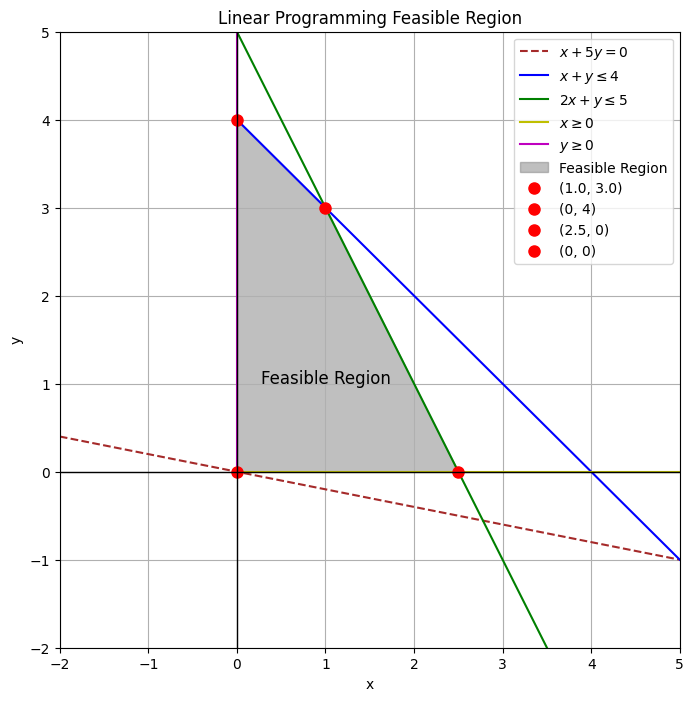

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraints
x = np.linspace(0, 5, 400)
y = np.linspace(0, 5, 400)

# Constraint lines
y1 = 4 - x
y2 = 5 - 2 * x
y0 = 0 * x
x0 = 0 * y

plt.figure(figsize=(8, 8))

# objective function
x_obj1 = np.linspace(-2, 5, 400)
y_obj1 = -0.2 * x_obj1
plt.plot(x_obj1, y_obj1, linestyle="--" , label=r'$x + 5y = 0$', color='brown')

# Plot the constraints
plt.plot(x, y1, label=r'$x + y \leq 4$', color='b')
plt.plot(x, y2, label=r'$2x + y \leq 5$', color='g')
plt.plot(x, y0, label=r'$x \geq 0$', color='y')
plt.plot(x0, y, label=r'$y \geq 0$', color='m')

# Fill feasible region
y3 = np.minimum(y1, y2)
plt.fill_between(x, 0, y3, where=(y3 >= 0), color='gray', alpha=0.5, label='Feasible Region')

# Find intersection points (vertices)
# 1. Intersection of x + y = 4 and 2x + y = 5
A = np.array([[1, 1], [2, 1]])
b = np.array([4, 5])
intersection1 = np.linalg.solve(A, b)

# 2. Intersection of x + y = 4 and x = 0
intersection2 = [0, 4]

# 3. Intersection of 2x + y = 5 and y = 0
intersection3 = [2.5, 0]

# 4. Origin
intersection4 = [0, 0]

# Highlight the vertices
vertices = [intersection1, intersection2, intersection3, intersection4]
for vertex in vertices:
    plt.plot(vertex[0], vertex[1], 'ro', markersize=8, label=f'{vertex[0], vertex[1]}')  # 'ro' for red circles

# Add labels and title
plt.xlim(-2, 5)
plt.ylim(-2, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Programming Feasible Region')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.legend()

# Add title for the feasible region
plt.text(1, 1, 'Feasible Region', fontsize=12, color='black', ha='center')

# Show plot
plt.grid(True)
plt.show()

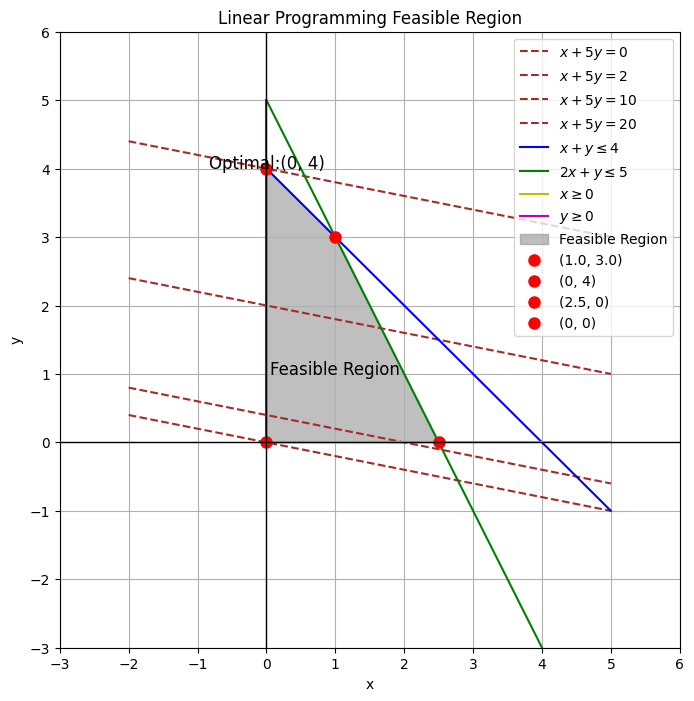

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraints
x = np.linspace(0, 5, 400)
y = np.linspace(0, 5, 400)

# Constraint lines
y1 = 4 - x
y2 = 5 - 2 * x
y0 = 0 * x
x0 = 0 * y

plt.figure(figsize=(8, 8))

# objective function
x_obj1 = np.linspace(-2, 5, 400)
y_obj1 = -0.2 * x_obj1
plt.plot(x_obj1, y_obj1, linestyle="--" , label=r'$x + 5y = 0$', color='brown')

y_obj2 = -0.2 * x_obj1 + 0.4
plt.plot(x_obj1, y_obj2, linestyle="--" , label=r'$x + 5y = 2$', color='brown')

y_obj3= -0.2 * x_obj1 + 2
plt.plot(x_obj1, y_obj3, linestyle="--" , label=r'$x + 5y = 10$', color='brown')

y_obj4= -0.2 * x_obj1 + 4
plt.plot(x_obj1, y_obj4, linestyle="--" , label=r'$x + 5y = 20$', color='brown')

# Plot the constraints

plt.plot(x, y1, label=r'$x + y \leq 4$', color='b')
plt.plot(x, y2, label=r'$2x + y \leq 5$', color='g')
plt.plot(x, y0, label=r'$x \geq 0$', color='y')
plt.plot(x0, y, label=r'$y \geq 0$', color='m')


# Fill feasible region
y3 = np.minimum(y1, y2)
plt.fill_between(x, 0, y3, where=(y3 >= 0), color='gray', alpha=0.5, label='Feasible Region')

# Find intersection points (vertices)
# 1. Intersection of x + y = 4 and 2x + y = 5
A = np.array([[1, 1], [2, 1]])
b = np.array([4, 5])
intersection1 = np.linalg.solve(A, b)

# 2. Intersection of x + y = 4 and x = 0
intersection2 = [0, 4]

# 3. Intersection of 2x + y = 5 and y = 0
intersection3 = [2.5, 0]

# 4. Origin
intersection4 = [0, 0]

# Highlight the vertices
vertices = [intersection1, intersection2, intersection3, intersection4]
for vertex in vertices:
    plt.plot(vertex[0], vertex[1], 'ro', markersize=8, label=f'{vertex[0], vertex[1]}')

plt.text(intersection2[0], intersection2[1], 'Optimal:(0, 4)', fontsize=12, color='black', ha='center')

# Add labels and title
plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Programming Feasible Region')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.legend()

# Add title for the feasible region
plt.text(1, 1, 'Feasible Region', fontsize=12, color='black', ha='center')

# Show plot
plt.grid(True)
plt.show()

## 习题1

某机床厂生产甲、乙两种机床，每台销售后的利润分别为 4000 元和 3000 元。生产甲机床需用 \(A\)、\(B\) 刀具加工，加工时间分别为每台 2 小时和 1 小时；生产乙机床需用 \(A\)、\(B\)、\(C\) 三种刀具加工，加工时间分别为每台 1 小时、1 小时和 1 小时。若每天可用于加工的刀具时数分别为 \(A\) 刀具 10 小时，\(B\) 刀具 8 小时和 \(C\) 刀具 7 小时，问该厂应生产甲、乙机床各几台，才能使总利润最大？

目标函数为：

$$ 
\text{max } z = 4000x_1 + 3000x_2 \tag{3-1}  
$$ 

约束条件为：  
$$ 
\begin{aligned}  
2x_1 + x_2 &\leq 10 \tag{3-2} \\
x_1 + x_2 &\leq 8   \\
x_2 &\leq 7 \\
x_1, x_2 &\geq 0  
\end{aligned}  
$$



In [ ]:
from pulp import *

def solve_machine_production_lp():
    # 定义问题：最大化目标函数
    # problem = LpProblem(...)

    # 定义决策变量：甲机床 x、乙机床 y
    # x = LpVariable(...)
    # y = LpVariable(...)

    # 定义目标函数
    #  problem += ...

    # 添加约束条件
    # problem += ...
    # problem += ...
    # problem += ...

    # 求解
    # problem...

    # 输出结果
    # status = ...
    # optimal_x = ...
    # optimal_y = ...
    # optimal_profit = ...

    # 大约需要 11 行代码
    # 你编写的代码从这里开始







    # 你编写的代码到这里结束

    return {
        'status': status,
        '甲机床生产数量': optimal_x,
        '乙机床生产数量': optimal_y,
        '总利润': optimal_profit
    }

In [ ]:
solve_machine_production_lp()

# 输出结果应该为：
#  {'status': 'Optimal', '甲机床生产数量': 2.0, '乙机床生产数量': 6.0, '总利润': 26000}

In [ ]:
# 测试你的函数
from testset3 import test_solve_machine_production_lp
test_solve_machine_production_lp(solve_machine_production_lp)

## 习题2

求解如下形式的一般线性规划问题：

$$
\begin{array}{rll}
\max & c_{0}x_0 + \cdots + c_{n-1}x_{n-1} \\[8pt]
\text{s.t.} & a_{0,0}x_0 + \cdots + a_{0,n-1}x_{n-1} & \leq b_0 \\[8pt]
& \vdots & \\[8pt]
& a_{m-1,0}x_0 + \cdots + a_{m-1,n-1}x_{n-1} & \leq b_{m-1}
\end{array}
$$

注意：为了方便 Python 程序员，我们的索引从 0 开始。

该线性规划问题有 $n$ 个决策变量 $x_0, x_1, \ldots, x_{n-1}$，以及 $m$ 个约束。

问题的数据将以三个列表的形式给出：

- **list_c** 是一个大小为 `n` 的列表，包含目标函数的系数。  
  示例：  
  ```
  list_c: [c0, ..., cn-1]
  ```

- **list_a** 是一个包含 $m$ 个列表的列表，其中每个子列表的大小为 $n$，表示所有约束的系数。  
  示例：  
  ```
  list_a: [ [a00, a01, ..., a0,n-1], 
            [a10, a11, ..., a1,n-1], 
            ...,
            [am-1,0, ..., am-1,n-1] ]
  ```

- **list_b** 是一个大小为 `m` 的列表，包含各不等式右侧的常数项。  
  示例：  
  ```
  list_b: [b0, ..., bm-1]
  ```

你的目标如下：

- 给定 `list_c`、`list_a` 和 `list_b`，使用 PULP 设置这个线性规划问题；
- 求解该问题；
- 返回结果。结果由一个包含三部分的元组构成：(is_feasible, is_bounded, opt_sol)。
  - **is_feasible** 是一个布尔值：如果线性规划问题可行，则为 `True`，否则为 `False`。
  - **is_bounded** 是一个布尔值：如果线性规划问题有界，则为 `True`，否则为 `False`。当且仅当 **is_feasible** 为 `True` 时，这个值才有意义。如果 **is_feasible** 为 `False`，此值可以是任意的。
  - **opt_sol** 是一个包含 `n` 个决策变量取值的列表，即 $x_0, x_1, \ldots, x_{n-1}$。当且仅当 **is_feasible** 和 **is_bounded** 均为 `True` 时，**opt_sol** 的值才有意义。如果不满足这些条件，其值可以是任意的。
```


In [ ]:
from pulp import *

def formulate_lp_problem(m, n, list_c, list_a, list_b):
    # Assert that the data is compatible.
    assert n > 0
    assert m > 0
    assert len(list_c) == n
    assert len(list_a) == len(list_b) and len(list_b) == m
    assert all(len(l) == n for l in list_a)

    ## 1. 创建一个线性规划问题
    # problem = LpProblem(...)
    ## 2. 创建决策变量
    # decision_vars = ...
    ## 3. 创建目标函数
    # object_function = ...
    ## 4. 添加约束条件
    # for ... :   #      共有m个约束条件
    #     expression = ...  # 生成约束条件的表达式
    #     problem +=  ...  # 添加约束条件
    ## 5. 求解
    # problem.solve()
    ## 6. 提取解
    # sols = ...
    # isInfeasible = ...
    # isUnbounded = ...
    # 大约需要 10 行代码

    # 你编写的代码从这里开始





    # 你编写的代码到这里结束

    ## 返回结果
    return isInfeasible, isUnbounded, sols

In [ ]:
from testset3 import test_formulate_lp_problem
test_formulate_lp_problem(formulate_lp_problem)

## 习题3

欢迎来到金融世界！
我们对投资一个多样化的股票组合感兴趣，希望最大化投资的总回报(利润/收益)，同时我们也希望投资是多样化的，且市盈率(PE)不能太高等，以降低风险。在这个问题中，我们将使用线性规划来构建投资组合。

- 给定可用的总预算为 $B > 0$
- 我们还获得了一系列可能的股票及其相关数据。每个投资的数据包括：
  - 每项投资的预期回报
  - 股票的当前单位价格
  - 股票的最近单位收益
  - 投资的市场类别：大宗商品、科技、医疗保健

你的目标是根据给定数据制定一个线性规划问题，以最大化总体预期回报，同时需要满足以下约束：
  - 投资总成本必须小于或等于 $B$
  - 只允许购买非负数量($\geq 0$)的每种股票(不允许卖空)。你可以购买股票的零散份额(这很有趣，但很多在线交易所都允许这样做)
  - 投资必须平衡：
    - 每个市场类别的投资额应小于或等于总预算的 2/3
    - 每个市场类别的投资额应至少为总预算的 1/6
  - 整体投资组合的市盈率不应超过 15
    - 市盈率计算公式：市盈率 = 股票的当前单位价格 / 股票的单位收益
    - 投资组合的市盈率 = 总的投资金额 / 总的收益(按照当前每股收益计算)

假设我们有以下六个投资，ID 为 1-6，数据(这些数据纯属虚构)如下表所示：

$$\begin{array}{|l|l|l|l|l|l|}
\hline
\text{ID} & \text{股票} & \text{单位价格} & \text{单位预期回报} & \text{每股收益} & \text{类别} \\ 
\hline 
1 & \text{IBM} & 129 & 25 & 1.9 & \text{科技} \\ 
2 & \text{META} & 286 & 20 & 8.1 & \text{科技} \\ 
3 & \text{阿斯利康} & 72.29 & 3 & 1.5 & \text{医疗} \\ 
4 & \text{辉瑞} & 38 & 1.5 & 5 & \text{医疗} \\ 
5 & \text{联合利华} & 52 & 3 & 2.5 & \text{大宗商品} \\ 
6 & \text{宝洁} & 148 & 4.50 & 5.2 & \text{大宗商品}\\
\hline
\end{array}$$

令 $x_1, \ldots, x_6$ 为决策变量，其中 $x_i$ 表示购买 ID 为 $i$ 的股票的数量。

请用 $x_1, \ldots, x_6$ 写出目标函数表达式。同时，说明我们是要最大化还是最小化它。将下面所有的数学公式中的问号改成具体的数字。

$$
\max (?x_1 +?x_2 +?x_3 + ?x_4 + ?x_5 + ?x_6)
$$

使用数学公式写下约束总的投资额必须小于等于 $B = 10,000$.

$$
?x_1 + ?x_2 + ?x_3 + ?x_4 +?x_5 + ?x_6 <= 10000
$$

写下约束每个类别的总投资额不能超过预算的 2/3。你应该写下三个约束，每个类别一个。

$
？x_1 +？x_2 <= 2/3 * 10000 
$

$
?x_3 + ?x_4 <=2/3 *10000
$

$
?x_5 + ?x_6 <= 2/3*10000
$

写下约束，每个类别的总投资额不能低于预算的 1/6。你应该写下三个约束，每个类别一个。

$
?x_1 + ?x_2 >= 1/6 * 10000 
$

$
?x_3 + ?x_4 >= 1/6 *10000
$

$
?x_5 + ?x_6 >= 1/6 *10000
$

投资组合的总成本表达式是：

$
?x_1 + ?x_2 + ?x_3 + ?x_4 + ?x_5 + ?x_6
$

投资组合的总收益的表达式是：

$
?x_1 + ?x_2 + ?x_3 + ?x_4 + ?x_5 +?x_6
$

我们希望强制执行的约束是，投资组合的总市盈率不能超过 15。将约束写成

$$ \text{Price} \leq 15 \times \text{Earnings} $$

将上面的表达式代入上面的公式：

$$
 ...  <= 15* (  ... )
$$

使用``pulp``库求解这个问题，并返回一个包含三个元素的元组，分别是：(is_feasible, is_bounded, opt_sol)。

In [ ]:
from pulp import *

def solve_investment_problem():
    # 定义问题：最大化目标函数
    # problem = LpProblem(...)

    # 定义决策变量：6只股票投资的股数
    # x1 = LpVariable(...)
    # x2 = LpVariable(...)
    # ...

    # 定义目标函数
    #  problem += ...

    # 投资总额必须等于 100000的约束
    # problem += ...

    # 每个类别的股票不能超过投资总额的2/3的约束
    # problem += ...
    # problem += ...
    # problem += ...

    # 每个类别不能少于投资综合的1/6的约束
    # problem += ...
    # problem += ...
    # problem += ...

    # 投资组合市盈率不能超过 15 的约束
    # problem += ...

    # 求解
    # problem...

    # 输出结果
    # status = ...
    # optimal_x1 = ...
    # optimal_x2 = ...
    # ...
    # optimal_x6 = ...
    # optimal_profit = ...

    # 大约需要 26 行代码
    # 你编写的代码从这里开始


    # 你编写的代码到这里结束

    result = {
        'status': status,
        'x1': optimal_x1,
        'x2': optimal_x2,
        'x3': optimal_x3,
        'x4': optimal_x4,
        'x5': optimal_x5,
        'x6': optimal_x6,
        'profit': optimal_profit
    }
    return result

In [ ]:
solve_investment_problem()
# 输出结果应该为：
# {'status': 'Optimal',
#  'x1': 33.830665,
#  'x2': 0.0,
#  'x3': 0.0,
#  'x4': 104.45204,
#  'x5': 32.051282,
#  'x6': 0.0,
#  'profit': 1098.598531}

In [ ]:
# 测试习题3
from testset3 import test_solve_investment_problem
test_solve_investment_problem(solve_investment_problem)

## 实验自动评分

运行下面的代码进行实验自动评分

In [ ]:
from testset3 import grade_all_tests
grade_all_tests()

## 实验总结

请尽量使用自己的语言回答下面的问题。

问题一： 线性规划问题的基本结构是什么？应该包含哪些部分？条件约束部分满足什么条件，这个问题才能成为一个线性规划问题？

问题2： 在解决线性规划问题时，最后的结果的状态有哪些情况？

## 生成实验报告

将实验报告pdf文件提交到对应的班级和实验的腾讯文档收集表:[文档汇总地址](https://docs.qq.com/doc/DWUxJanVwYXFpZmF2)

In [ ]:
import sys
import os
from testset3 import grade_all_tests

# Add the root directory (parent directory of `util`) to sys.path
root_dir = os.path.abspath("..")  # Adjust based on the structure
sys.path.append(root_dir)

from util import notebook2pdf, notebook_info_extractor

notebook_file = "实验3-线性规划.ipynb"
stu_info  = notebook_info_extractor.extract_from_ipynb(notebook_file)
stu_grade = grade_all_tests()
html_file = "notebook3.html"
pdf_file = f"{stu_info['class_id']}-{stu_info['student_id']}-{stu_info['name']}-实验报告3-{stu_grade}.pdf"

notebook2pdf.notebook_to_html(notebook_file, html_file)
notebook2pdf.html_to_pdf(html_file, pdf_file)